In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic-models/scikitlearn/default/10/model_svc_1.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_1.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_3.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_5.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_2.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_9.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_6.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_7.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_8.joblib
/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_4.joblib
/kaggle/input/titanic-models/scikitlearn/default/11/model_svc_1.joblib
/kaggle/input/titanic-models/scikitlearn/default/11/model_rf_3_1.joblib
/kaggle/input/titanic-models/scikitlearn/default/

<div>
    <h1> <a id="Obj1">🎯Objectives</a></h1>
    <h3 style="text-align:justify; font-family: Calibri">Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). <br></h3>  
  
<p style = "font-family: Arial; font-size: 14px">Note: This project's dataset was created for pedagogical purposes and may not be indicative of the task .</p>
<hr>

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We must maintain objectivity when analyzing the data to gain valuable insights. This involves collecting, fact-checking, and challenging the data and other sources. Adopting a Genchi Genbutsu approach, which involves go-seeing for yourself or discussing with subject matter experts, allows us to delve into the data to gain firsthand understanding.</p>
    <p>Data should adhere to the <b>COV-FAST</b> principles: Clear, Objective, Valuable, Focused, Agile, Scientific, and Time-bound and Trustworthiness. Additionally, consider exploring alternative models such as logistic regression, random forest, neural networks, or others.</p>
</div>
    <h3>Framework and methodologies</h3>
     A <b>methodology</b> offers <b>specific steps</b> for completing a project, while a <b>framework</b> provides broader guidance on tools, resources, and workflow processes. As an experienced Green Belt Lean Six Sigma professional, the methodology that I often use is DMAIC. I use PACE as a framework as I found it similar to <b>Knowledge Discovery in Databases (KDD)</b>. Both <b>PACE</b> and <b>KDD</b> aim to guide structured data projects. <b>PACE</b> specifically focuses on machine learning projects, whereas <b>KDD</b> covers a broader range of data discovery techniques.
     
<h3>Data analysis PACE steps:</h3>
   <ol style="font-family:Verdana; font-size:16px">
    <li><img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="50"> Plan/Prepare - import the relevant libraries and data</li> 
    <blockquote>
    <ol>Align project with business needs, requirements and contraints. Select an approriate machine learning model based on the problem and business context. KDD: Selection, and Data Wrangling (Pre-processing and Transformation).
    </ol>
    </blockquote>
        <li><img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">Analyze - EDA</li>
    <blockquote>
    <ol> Understanding data for accurate predictions, focus on the response variable (what the model predicts) and leverage exploratory data analysis to uncover patterns and address irregularities. KDD: Data Mining.
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">Construct - model </li>
    <blockquote>
    <ol>Construct and evaluate model. KDD: Evaluation.
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50">Execute - share</li>
    <blockquote>
    <ol>Interpret model and share the story. KDD: Communicate to stakeholders.
     </ol>
    </blockquote>

<a id="top"></a>
<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">

<ol>
    <li><a href="#Obj1">Objectives</a></li>
    <li><a href="#Plan">Plan - import the relevant libraries and data</a></li>
    <ul>
        <li><a href="#Def">Data Info</a></li>
    </ul>
    <li><a href="#EDA">Explarotary Data Analysis (EDA)</a></li>
    <ul>
        <li><a href="#EDA_1">Explarotary Data Analysis (EDA)</a></li>
    </ul>
    <li><a href="#Construct">Construct - model</a></li>
    <ul>
        <li><a href="#RF">Random forest</a></li>
        <li><a href="#SVC">SVC (Support Vector Classifier)</a></li>
    </ul>
    <li><a href="#Exe">Execute - share</a></li>
    <ul>
        <li><a href="#Sum">Summary </a></li>
    </ul>
</ol>
</div>

<img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="50">

<h1><a id="Plan">Plan -import the relevant libraries and data</a></h1> 

In [2]:
# For linear algebra and data processing (available in kaggle)
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Display full dataframe columns
pd.set_option('display.max_columns', None)

# Regular expressions and statistics
import re
from scipy import stats

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier

# Preprocessing, model selection, metrics
from sklearn.model_selection import (
    train_test_split, GridSearchCV, cross_val_score,
    StratifiedKFold, cross_validate, cross_val_predict
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Imbalanced learning
#from imblearn.pipeline import Pipeline as ImbPipeline
#from imbalanced-learn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTE

# SHAP for model explainability
import shap

# Saving/loading models
import joblib
from joblib import dump, load

# Miscellaneous
from collections import Counter

<h2><a id="Def">Data info</a></h2>
<h3 style="text-align:justify; font-family: Calibri"><br> Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. <br> 
    <br>  The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.  <br> 
   <br>   Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.  <br> 
  <br>    Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.</h3>

In [3]:
data_df = pd.read_csv('/kaggle/input/task001-p01-ds-titanic-20250411/train_df_1.csv')
all_data_df = pd.read_csv('/kaggle/input/task001-p01-ds-titanic-20250411/all_data_df.csv')

In <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p001-ml-titanic-20250407">part 1 (P01)</a>, we conduct the P and A phase. In <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p002-ml-titanic-20250416">part 2 (P02)</a>, we explore 11 machine learning models.

In [4]:
df=all_data_df.copy()
df.sample(5)

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_set,AgeGroup,CabinGroup,CabinNo,CabinCnt,Fare_log,Title,Surname,TicketGroup,FamilyGroup,FareGroup,FamilySize
672,673,0.0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S,1,Senior,U,0,0,2.442347,Mr,Mitchell,CA,Solo,<50,1
1008,1009,NaN,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,S,0,Child,G,6,1,2.873565,Miss,Sandstrom,XXX,Small Family,<50,2
145,146,0.0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,S,1,Young Adult,U,0,0,3.630985,Mr,Nicholls,CA,Small Family,<50,3
941,942,NaN,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,S,0,Young Adult,C,31,1,4.110874,Mr,Smith,XXX,Large Family,<50,6
404,405,0.0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,S,1,Young Adult,U,0,0,2.268252,Miss,Oreskovic,XXX,Solo,<50,1


In [5]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
train_set        0
AgeGroup         1
CabinGroup       0
CabinNo          0
CabinCnt         0
Fare_log         1
Title            0
Surname          0
TicketGroup      0
FamilyGroup      0
FareGroup        0
FamilySize       0
dtype: int64

#### Quick fix `Age` and `Fare`

In [6]:
df[df['AgeGroup'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_set,AgeGroup,CabinGroup,CabinNo,CabinCnt,Fare_log,Title,Surname,TicketGroup,FamilyGroup,FareGroup,FamilySize
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S,1,NaN,A,23,1,3.433987,Mr,Barkworth,XXX,Solo,<50,1


In [7]:
df['AgeGroup'].unique()

array(['Young Adult', 'Adult', 'Senior', 'Child', 'Teen', nan],
      dtype=object)

In [8]:
# Fill missing values in 'AgeGroup' with 'Senior' for df
df['AgeGroup'] = df['AgeGroup'].fillna('Senior')

# Do the same for all_data_df
all_data_df['AgeGroup'] = all_data_df['AgeGroup'].fillna('Senior')

In [9]:
# Fill missing 'Fare' values with its median
fare_median = df['Fare'].median()
df['Fare'] = df['Fare'].fillna(fare_median)

# Fill missing 'Fare_log' values with its median
fare_log_median = df['Fare_log'].median()
df['Fare_log'] = df['Fare_log'].fillna(fare_log_median)

# For all_data_df
fare_median_all = all_data_df['Fare'].median()
all_data_df['Fare'] = all_data_df['Fare'].fillna(fare_median_all)

fare_log_median_all = all_data_df['Fare_log'].median()
all_data_df['Fare_log'] = all_data_df['Fare_log'].fillna(fare_log_median_all)

In [10]:
df.select_dtypes(include=[np.number]).columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'train_set',
 'CabinNo',
 'CabinCnt',
 'Fare_log',
 'FamilySize']

[go to top](#top)  

<img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">

<h1><a id="EDA">Analyze - Explarotary Data Analysis (EDA)</a></h1> 

In <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p001-ml-titanic-20250407">part 1 (P01)</a>, we conduct the P and A phase. In <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p002-ml-titanic-20250416">part 2 (P02)</a>, we explore 11 machine learning models.

### Create function

In [11]:
def quick_view_model(X_train, y_train, cv=5, sort_by='Accuracy'):
    """
    Evaluates multiple classification models using cross-validation.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - cv: Number of cross-validation folds (default=5)
    - sort_by: Metric to sort the result table by (default='Accuracy')
    
    Returns:
    - results_df: DataFrame with mean and std CV scores for each model
    """

    # Define models
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'GaussianNB': GaussianNB(),
        'SVC': SVC(probability=True),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'ExtraTrees': ExtraTreesClassifier(random_state=42),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'LightGBM': LGBMClassifier(verbosity=-1, random_state=42),
        'KNN': KNeighborsClassifier()
    }

    # Initialize results dictionary
    results = {}

    # Evaluate each model
    for name, model in models.items():
        pipe = Pipeline([
            ('scaler', StandardScaler()),  # Can skip for tree-based
            ('classifier', model)
        ])

        # Cross-validation
        scores = cross_validate(
            pipe, X_train, y_train, cv=cv,
            scoring={
                'accuracy': 'accuracy',
                'auc': 'roc_auc',
                'f1': 'f1',
                'precision': 'precision',
                'recall': 'recall'
            },
            return_train_score=False
        )

        # Store mean and std for each metric
        results[name] = {
            'Accuracy Mean': np.mean(scores['test_accuracy']),
            'Accuracy Std': np.std(scores['test_accuracy']),
            'AUC Mean': np.mean(scores['test_auc']),
            'AUC Std': np.std(scores['test_auc']),
            'F1-Score Mean': np.mean(scores['test_f1']),
            'F1-Score Std': np.std(scores['test_f1']),
            'Precision Mean': np.mean(scores['test_precision']),
            'Precision Std': np.std(scores['test_precision']),
            'Recall Mean': np.mean(scores['test_recall']),
            'Recall Std': np.std(scores['test_recall'])
        }

    # Convert to DataFrame
    results_df = pd.DataFrame(results).T

    # Sort by selected mean metric
    if f'{sort_by} Mean' in results_df.columns:
        results_df = results_df.sort_values(by=f'{sort_by} Mean', ascending=False)

    # Round for display
    print(f"\nModel Comparison (sorted by {sort_by} Mean):\n")
    print(results_df.round(4))
    
    return results_df

In [12]:
def quick_view_models_plot(results_df, metric='Accuracy'):
    """
    Plots the mean and standard deviation of model performance scores.
    
    Parameters:
    - results_df: DataFrame output from quick_view_model()
    - metric: Metric to plot (e.g., 'Accuracy', 'F1-Score')
    """
    # Construct column names for mean and std
    mean_col = f"{metric} Mean"
    std_col = f"{metric} Std"

    # Check if metric exists
    if mean_col not in results_df.columns or std_col not in results_df.columns:
        raise ValueError(f"Metric '{metric}' not found in results_df. Check column names.")

    # Drop GaussianNB if present
    filtered_df = results_df.drop(index='GaussianNB', errors='ignore')

    # Plotting data
    models = filtered_df.index
    mean_scores = filtered_df[mean_col]
    std_devs = filtered_df[std_col]
    x_pos = np.arange(len(models))

    # Plot
    plt.figure(figsize=(12, 8))
    plt.errorbar(x_pos, mean_scores, yerr=std_devs, fmt='o-', linewidth=2, capsize=6,
                 markersize=8, label=f'Mean {metric} ± Std Dev')
    plt.fill_between(x_pos, mean_scores - std_devs, mean_scores + std_devs,
                     alpha=0.2, color='skyblue')

    plt.xticks(x_pos, models, rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Models', fontsize=12, fontweight='bold')
    plt.ylabel(f'{metric} Score', fontsize=12, fontweight='bold')
    plt.title(f'Model Comparison (Excl. GaussianNB) - {metric}', fontsize=14, fontweight='bold')

    # Annotate each point
    for i, (m, s) in enumerate(zip(mean_scores, std_devs)):
        plt.text(i, m + 0.002, f"{m:.3f}±{s:.3f}", ha='center', fontsize=9)

    plt.ylim(min(mean_scores - std_devs) - 0.02, max(mean_scores + std_devs) + 0.02)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [13]:
def quick_view_models_chart(results_df, metrics=None):
    """
    Plots a grouped bar chart to compare multiple evaluation metrics (Mean) across models.
    """
    if metrics is None:
        metrics = ['Accuracy Mean', 'AUC Mean', 'F1-Score Mean', 'Precision Mean', 'Recall Mean']

    # Drop GaussianNB if present
    #results_df = results_df.drop(index='GaussianNB', errors='ignore')
    models = results_df.index
    x = np.arange(len(models))
    width = 0.13

    colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'violet']
    if len(metrics) > len(colors):
        raise ValueError("Too many metrics. Add more colors.")

    plt.figure(figsize=(16, 8))

    for i, metric in enumerate(metrics):
        if metric not in results_df.columns:
            raise ValueError(f"Metric '{metric}' not found in results_df.")
        values = results_df[metric]
        plt.bar(x + i * width, values, width, label=metric, color=colors[i])

        for j, val in enumerate(values):
            plt.text(j + i * width, val + 0.015, f"{val:.2f}", ha='center', fontsize=8)

    plt.ylabel('Score', fontsize=12, fontweight='bold')
    plt.title('Model Comparison by Evaluation Metrics (Mean)', fontsize=14, fontweight='bold')
    plt.xticks(x + width * (len(metrics)-1) / 2, models, rotation=45, ha='right')
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Metrics", loc='upper right')
    plt.tight_layout()
    plt.show()

[go to top](#top)  

<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

<h1><a id="Construct">Construct - model</a></h1>  

### Baseline feature selection (original 83 Features, lightly imbalanced data)

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
# Convert the 'Pclass' and 'FamilySize' columns to string (object) type for pd.get_dummies() Using this will acquire 83 features
# Let us apply without converting to string
df[['Pclass', 'FamilySize']] = df[['Pclass', 'FamilySize']].astype(str)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'train_set', 'AgeGroup',
       'CabinGroup', 'CabinNo', 'CabinCnt', 'Fare_log', 'Title', 'Surname',
       'TicketGroup', 'FamilyGroup', 'FareGroup', 'FamilySize'],
      dtype='object')

In [17]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize']])

X_train = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

y_train = df[df.train_set==1].Survived
y_train.shape

(891,)

In [18]:
X_train.head()

,Age,SibSp,Parch,CabinCnt,Fare_log,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinGroup_A,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,TicketGroup_A4,TicketGroup_A5,TicketGroup_AS,TicketGroup_C,TicketGroup_CA,TicketGroup_CASOTON,TicketGroup_FC,TicketGroup_FCC,TicketGroup_Fa,TicketGroup_LINE,TicketGroup_PC,TicketGroup_PP,TicketGroup_PPP,TicketGroup_SC,TicketGroup_SCA4,TicketGroup_SCAH,TicketGroup_SCOW,TicketGroup_SCPARIS,TicketGroup_SCParis,TicketGroup_SOC,TicketGroup_SOP,TicketGroup_SOPP,TicketGroup_SOTONO2,TicketGroup_SOTONOQ,TicketGroup_SP,TicketGroup_STONO,TicketGroup_STONO2,TicketGroup_SWPP,TicketGroup_WC,TicketGroup_WEP,TicketGroup_XXX,FamilyGroup_Large Family,FamilyGroup_Small Family,FamilyGroup_Solo,FamilySize_1,FamilySize_11,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8
0,22.0,1,0,0,2.110213,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1,38.0,1,0,1,4.280593,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,26.0,0,0,0,2.188856,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,35.0,1,0,1,3.990834,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
4,35.0,0,0,0,2.202765,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False


In [19]:
X_train.shape

(891, 83)

invalid value encountered in greater
invalid value encountered in less


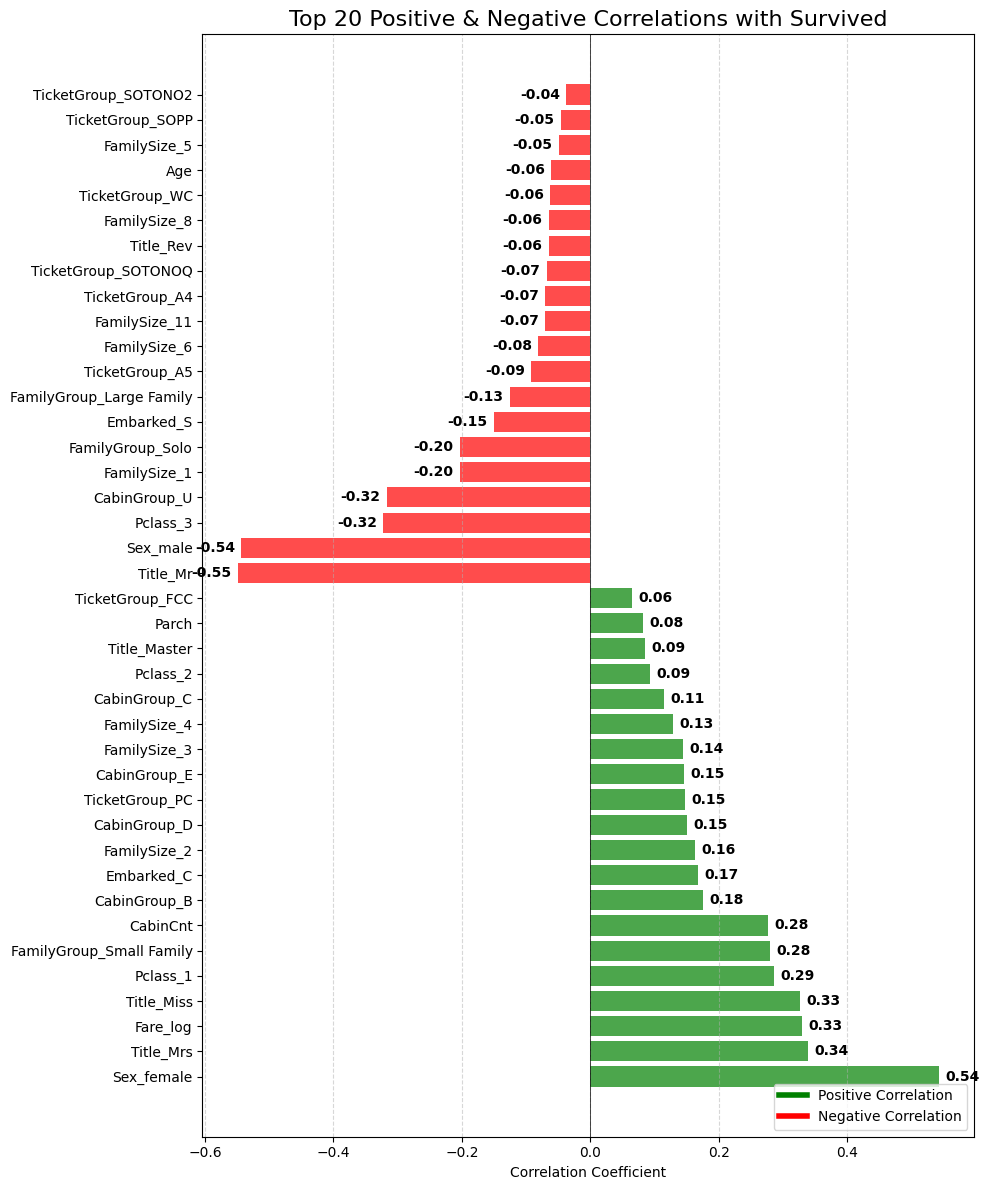

In [20]:
# Merge 'Survived' into df_dummies temporarily
df_corr = df_dummies.copy()
df_corr['Survived'] = df['Survived']

# Calculate correlation with 'Survived'
corr = df_corr.corr()['Survived'].drop('Survived')

# Top 20 positive and top 20 negative correlations
top_positive = corr[corr > 0].sort_values(ascending=False).head(20)
top_negative = corr[corr < 0].sort_values().head(20)
top_combined = pd.concat([top_positive, top_negative])

# Bar colors based on sign
colors = ['green' if val > 0 else 'red' for val in top_combined]

# Plot
plt.figure(figsize=(10, 12))
bars = plt.barh(top_combined.index, top_combined.values, color=colors, alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Top 20 Positive & Negative Correlations with Survived', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01 if width > 0 else width - 0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center',
             ha='left' if width > 0 else 'right',
             color='black',
             fontweight='bold')

# Add legend
legend = [Line2D([0], [0], color='green', lw=4, label='Positive Correlation'),
          Line2D([0], [0], color='red', lw=4, label='Negative Correlation')]
plt.legend(handles=legend, loc='lower right')

plt.tight_layout()
plt.show()

[go to top](#top)  

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Inference:</b><p style = "font-family:Verdana; font-size:14px">

<ol> We have identified features that are correlated with the survival rate on the Titanic:
    <li><b>The top 5 features positively correlated with survival are: 
        <ul>
            <li>Sex (Female) <li>Title (Mrs and Miss) <li>Fare_log <li>PClass = 1 (first class) available when string  <li>Family Group = (small)</ul>
    <li><b>The top 5 features negatively correlated with survival are:
        <ul>
            <li>Title (Mr) <li>Sex (Male)<li>Fare_log <li>PClass = 3 (third class) (no class if integer)<li>CabinGroup = unknown (missing cabin) <li>Family Size = 1<li>Family Group = (solo)</ul> 
</ol>
</div>

[go to top](#top)  

### Create a Model Pipe

#### Quick view (11 models of 12 models)

In [21]:
%%time
base_model = quick_view_model(X_train, y_train, cv=5, sort_by='Accuracy')


Model Comparison (sorted by Accuracy Mean):

                    Accuracy Mean  Accuracy Std  AUC Mean  AUC Std  \
LightGBM                   0.8261        0.0213    0.8671   0.0377   
XGBoost                    0.8238        0.0328    0.8649   0.0307   
GradientBoosting           0.8216        0.0232    0.8875   0.0332   
SVC                        0.8182        0.0162    0.8505   0.0206   
LogisticRegression         0.8081        0.0190    0.8675   0.0267   
RandomForest               0.8069        0.0346    0.8617   0.0331   
AdaBoost                   0.8014        0.0275    0.8617   0.0339   
KNN                        0.7913        0.0355    0.8417   0.0408   
ExtraTrees                 0.7912        0.0184    0.8497   0.0264   
DecisionTree               0.7789        0.0257    0.7683   0.0400   
GaussianNB                 0.4377        0.0344    0.5427   0.0261   

                    F1-Score Mean  F1-Score Std  Precision Mean  \
LightGBM                   0.7644        0.035

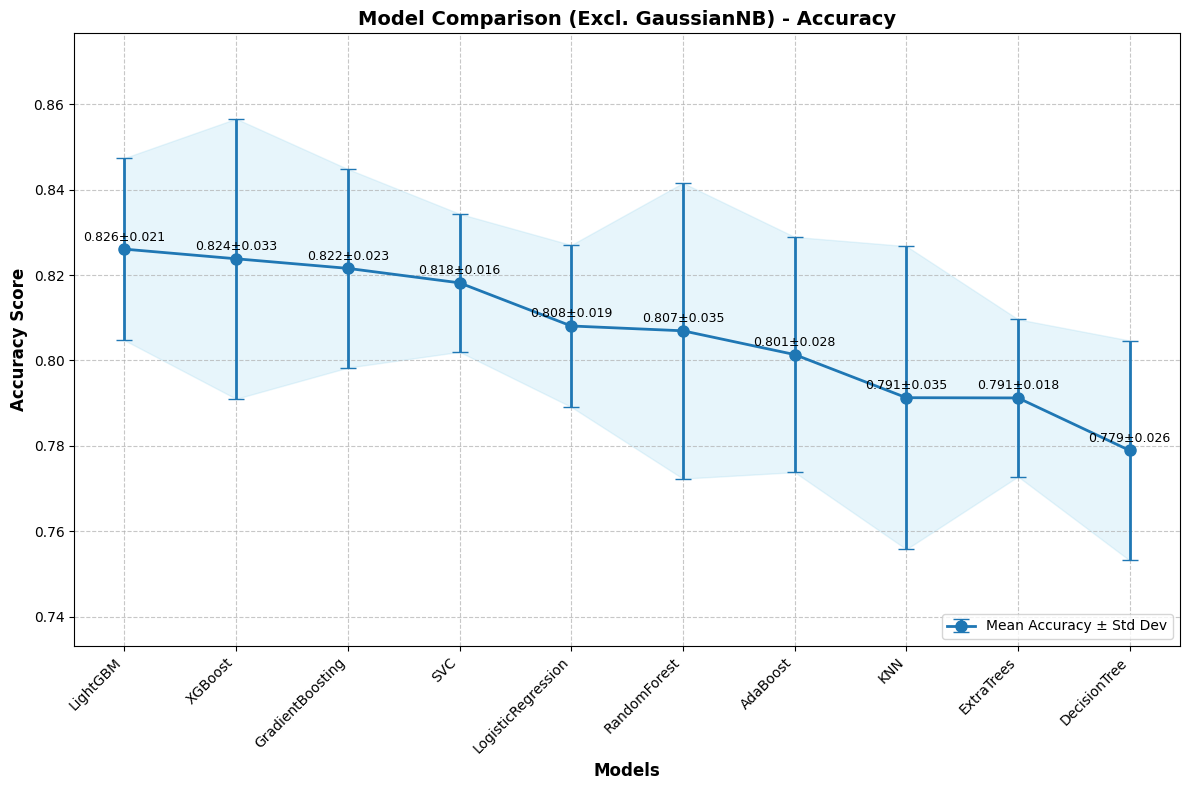

In [22]:
base_model_plot = quick_view_models_plot(base_model, metric='Accuracy')

### Quick view all of the 11 models

Add Voting Classifier

In [23]:
%%time
# 2min 32s
cv = 5
estimators1 = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('svc', SVC(probability=True))
]

estimators2 = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

estimators3 = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
]

estimators4 = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('gb', GradientBoostingClassifier()),
    ('lr', LogisticRegression(max_iter=1000))
]

estimators5 = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('gb', GradientBoostingClassifier()),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True))
]

estimators6 = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgb', LGBMClassifier(verbosity=-1)),
    ('lr', LogisticRegression(max_iter=1000))
]

# Initialize the voting classifiers
voting_models = {
    'Voting1 (Boosted + SVC)': VotingClassifier(estimators=estimators1, voting='soft'),
    'Voting2 (Mix 1)': VotingClassifier(estimators=estimators2, voting='soft'),
    'Voting3 (Mix 2)': VotingClassifier(estimators=estimators3, voting='soft'),
    'Voting4 (Boosted + LR)': VotingClassifier(estimators=estimators4, voting='soft'),
    'Voting5 (Boosted + LR + SVC)': VotingClassifier(estimators=estimators5, voting='soft'),
    'Voting6 (LBoosted + LR + SVC)': VotingClassifier(estimators=estimators6, voting='soft')
}

# Compare them and store results
voting_results = {}
for name, model in voting_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    voting_results[name] = {
        'mean_accuracy': np.mean(scores),
        'std': np.std(scores)
    }

# Convert results to DataFrame and display sorted
voting_results_df = pd.DataFrame(voting_results).T.sort_values(by='mean_accuracy', ascending=False)
print(voting_results_df)

                               mean_accuracy       std
Voting4 (Boosted + LR)              0.838372  0.028354
Voting6 (LBoosted + LR + SVC)       0.837273  0.020920
Voting5 (Boosted + LR + SVC)        0.835013  0.020619
Voting1 (Boosted + SVC)             0.829402  0.026750
Voting2 (Mix 1)                     0.820413  0.025707
Voting3 (Mix 2)                     0.815950  0.014206
CPU times: user 28 s, sys: 145 ms, total: 28.2 s
Wall time: 12 s


<h3> We're building a safety system where both precision and recall matter — we don't want to falsely say someone survived (false positive), and we don’t want to miss real survivors.</h3>

In [24]:
# Voting4 model (Boosted + LR)
voting4 = VotingClassifier(estimators=estimators4, voting='soft')

# Evaluate using cross_validate with scoring
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores = cross_validate(voting4, X_train, y_train, cv=5, scoring=scoring)

# Compute mean and std
voting4_results = {
    'Accuracy Mean': np.mean(scores['test_accuracy']),
    'Accuracy Std': np.std(scores['test_accuracy']),
    'Precision Mean': np.mean(scores['test_precision']),
    'Precision Std': np.std(scores['test_precision']),
    'Recall Mean': np.mean(scores['test_recall']),
    'Recall Std': np.std(scores['test_recall']),
    'F1-Score Mean': np.mean(scores['test_f1']),
    'F1-Score Std': np.std(scores['test_f1']),
    'AUC Mean': np.mean(scores['test_roc_auc']),
    'AUC Std': np.std(scores['test_roc_auc']),
}

# Convert to DataFrame
voting4_df = pd.DataFrame({'Voting4 (Boosted + LR)': voting4_results}).T

# Concat with base_model DataFrame
base_model_1 = pd.concat([base_model, voting4_df], axis=0)

# Sort by Accuracy Mean in descending order
base_model_1 = base_model_1.sort_values(by='Accuracy Mean', ascending=False)

# Display result
print(base_model_1)

                        Accuracy Mean  Accuracy Std  AUC Mean   AUC Std  \
Voting4 (Boosted + LR)       0.838372      0.028354  0.886733  0.028391   
LightGBM                     0.826069      0.021322  0.867093  0.037732   
XGBoost                      0.823809      0.032781  0.864919  0.030734   
GradientBoosting             0.821568      0.023242  0.887547  0.033166   
SVC                          0.818178      0.016160  0.850464  0.020610   
LogisticRegression           0.808079      0.018953  0.867487  0.026679   
RandomForest                 0.806949      0.034608  0.861728  0.033095   
AdaBoost                     0.801387      0.027539  0.861710  0.033899   
KNN                          0.791287      0.035487  0.841714  0.040819   
ExtraTrees                   0.791231      0.018410  0.849671  0.026386   
DecisionTree                 0.778928      0.025743  0.768287  0.040025   
GaussianNB                   0.437656      0.034397  0.542740  0.026106   

                        

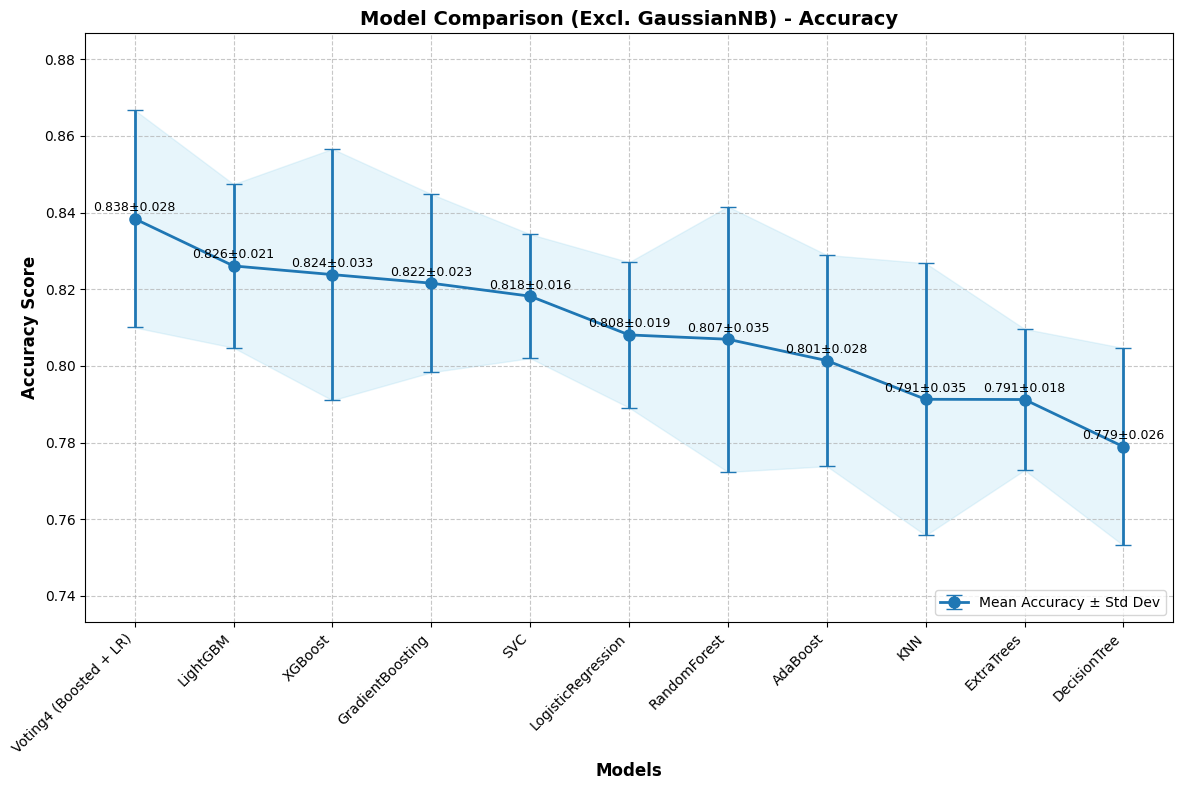

In [25]:
base_model_1_plot = quick_view_models_plot(base_model_1, metric='Accuracy')

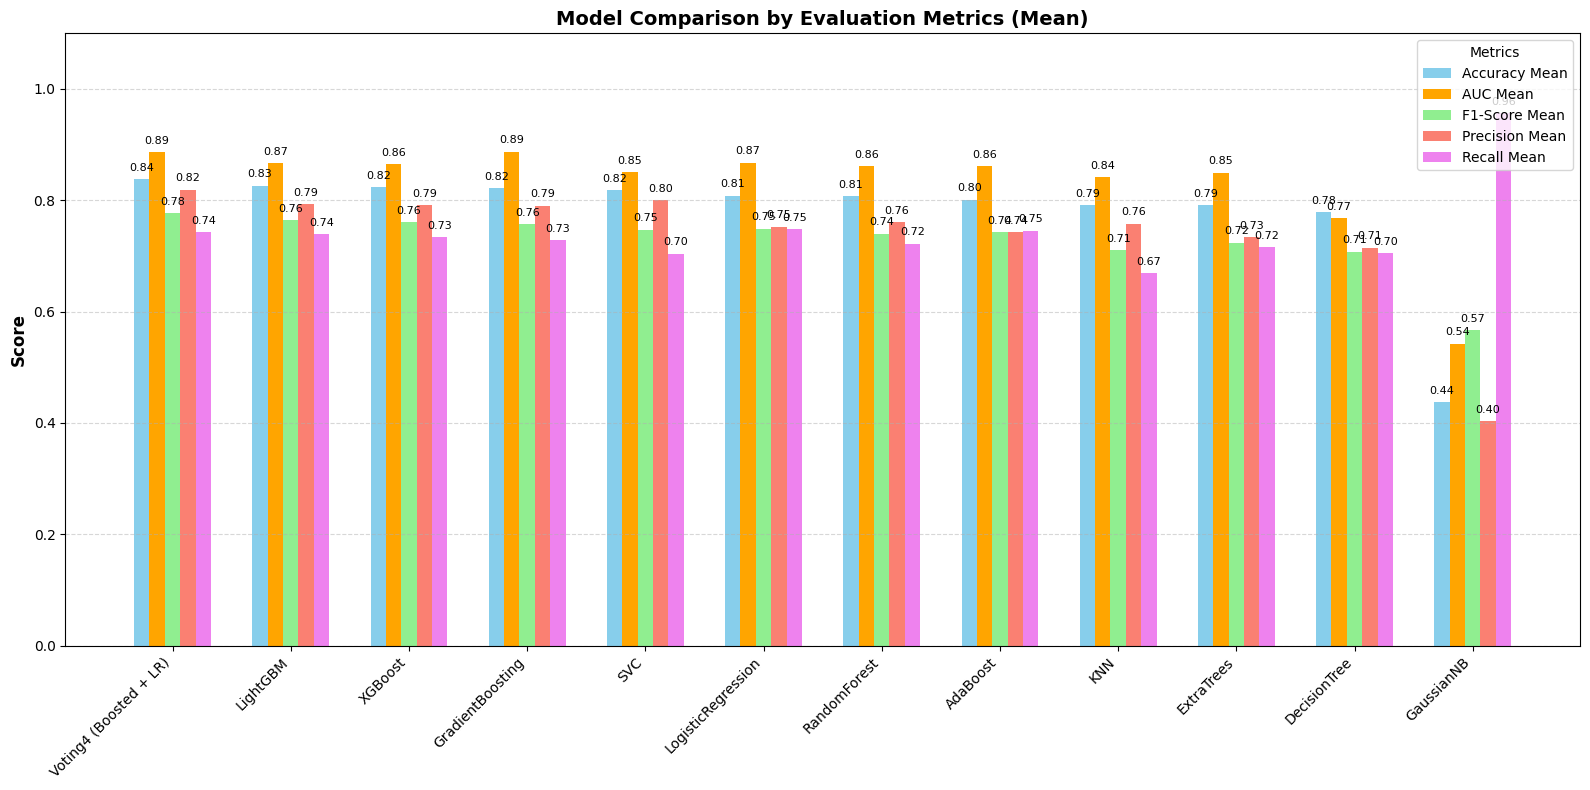

In [26]:
base_model_1_chart = quick_view_models_chart(base_model_1, metrics=None)

[go to top](#top)  

## Hyperparameter Tuning (1st)
### Random Forest

In [27]:
def model_rf_selection_grid(X_train, y_train, cv=5, scoring='accuracy', class_weight=False):
    """
    Performs hyperparameter tuning for RandomForestClassifier using GridSearchCV.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series or np.array): Training target.
        cv (int): Number of cross-validation folds (default is 5).
        scoring (str): Scoring metric (default is 'accuracy').
        class_weight (bool): Whether to apply class_weight='balanced' (default is False).

    Returns:
        GridSearchCV object (fitted)
    """
    
    # Set class_weight
    class_weight = 'balanced' if class_weight else None

    pipe_rf = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weight))
    ])

    param_grid = {
        'classifier__max_depth': [4, 6, 8, 9, 10],
        'classifier__n_estimators': [50, 100],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__min_samples_split': [2, 3, 10],
        'classifier__min_samples_leaf': [1, 3, 10],
        'classifier__bootstrap': [True],
        'classifier__oob_score': [True, False],
        'classifier__criterion': ['gini', 'entropy', 'log_loss']
    }

    grid_search = GridSearchCV(pipe_rf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print(f"Best {scoring.capitalize()} Score: {grid_search.best_score_:.4f}")
    
    return grid_search

#### Model 1: Random forest, lighly imbalanced data and 83 features

In [28]:
%%time
#6min 24s
#model_rf_1 = model_rf_selection_grid(X_train, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [29]:
# Save to file after fitting
#dump(model_rf_1, 'model_rf_1.joblib')
#model_rf_1.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_1.joblib')

# Access best estimator
model_rf_1 = grid_loaded.best_estimator_

<h4> When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.
In fact, feature selection comes with many benefits:
<ul>
    <li>It decreases redundancy among the data
    <li>It speeds up the training process
    <li>It reduces overfitting</ul>
Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.
</h4>

In [30]:
def train_and_predict(model, X_train, y_train, X_test, test_ids, cv=5, submission_name='submission.csv'):
    """
    Trains the model, performs cross-validation, and makes predictions on the test set.

    Parameters:
    - model: Machine learning model with fit/predict methods
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - test_ids: IDs for submission (e.g., PassengerId)
    - cv: Number of cross-validation folds (default=5)
    - submission_name: Filename for the CSV submission
    """
    
    # Step 1: Train the model
    model.fit(X_train, y_train)
    
    # Step 2: Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validation scores:", scores)
    print("Mean cross-validation score:", scores.mean())
    
    # Step 3: Retrain (optional here, just to match original process)
    model.fit(X_train, y_train)
    
    # Step 4: Predict
    y_pred = model.predict(X_test).astype(int)
    
    # Step 5: Create submission
    submission = pd.DataFrame({
        'PassengerId': test_ids,
        'Survived': y_pred
    })
    
    submission.to_csv(submission_name, index=False)
    print(f"Submission saved to {submission_name}")

In [31]:
def compute_metrics_df(models, X, y):
    """
    Computes cross-validated metrics for a list of models and returns a sorted DataFrame.
    
    Parameters:
        models (list): List of tuples like [('Model Name', model_instance), ...]
        X (pd.DataFrame): Feature data.
        y (pd.Series or np.array): Target values.
    
    Returns:
        pd.DataFrame: DataFrame of metrics sorted by Accuracy Mean.
    """
    results = []

    for name, model in models:
        # Cross-validated accuracy scores
        accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

        # Cross-validated predictions and predicted probabilities
        y_pred = cross_val_predict(model, X, y, cv=cv)
        y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

        # Collect metrics
        metrics = {
            'Model': name,
            'Accuracy Mean': np.mean(accuracy_scores),
            'Accuracy Std': np.std(accuracy_scores),
            'AUC': roc_auc_score(y, y_proba),
            'F1 Score': f1_score(y, y_pred),
            'Precision': precision_score(y, y_pred),
            'Recall': recall_score(y, y_pred)
        }
        results.append(metrics)

    # Convert to DataFrame and sort
    metrics_df = pd.DataFrame(results)
    metrics_df.sort_values(by='Accuracy Mean', ascending=False, inplace=True)
    
    return metrics_df

In [32]:
%%time
#566 ms
train_and_predict(
    model=model_rf_1, # Tweak to find the best model and try other ml models
    X_train=X_train, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_1.csv'
)

Cross-validation scores: [0.83798883 0.8258427  0.83707865 0.80898876 0.87640449]
Mean cross-validation score: 0.8372606867114432
Submission saved to submit_rf_1.csv
CPU times: user 830 ms, sys: 785 µs, total: 831 ms
Wall time: 724 ms


In [33]:
# Define your model list
models = [
    ('Random Forest', model_rf_1),
    # Add more models if needed
]

# Get the metrics DataFrame
metrics_df = compute_metrics_df(models, X_train, y_train)
metrics_df

,Model,Accuracy Mean,Accuracy Std,AUC,F1 Score,Precision,Recall
0,Random Forest,0.837261,0.022192,0.869862,0.778626,0.814696,0.745614


#### Score at kaggle 78.5%

#### Model 2: Random forest, balanced data and 83 features

In [34]:
%%time
#3min 52s
#model_rf_2 = model_rf_selection_grid(X_train, y_train, cv=5, scoring='accuracy', class_weight=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [35]:
# Save to file after fitting
#dump(model_rf_2, 'model_rf_2.joblib')
#model_rf_2.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_2.joblib')

# Access best estimator
model_rf_2 = grid_loaded.best_estimator_

In [36]:
%%time
#871 ms
train_and_predict(
    model=model_rf_2, # Tweak to find the best model and try other ml models
    X_train=X_train, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_2.csv'
)

Cross-validation scores: [0.82122905 0.81460674 0.8258427  0.82022472 0.86516854]
Mean cross-validation score: 0.8294143493817087
Submission saved to submit_rf_2.csv
CPU times: user 749 ms, sys: 6.79 ms, total: 756 ms
Wall time: 656 ms


In [37]:
# Define your model list
models = [
    ('Random Forest', model_rf_2),
    # Add more models if needed
]

# Get the metrics DataFrame
metrics_df = compute_metrics_df(models, X_train, y_train)
metrics_df

,Model,Accuracy Mean,Accuracy Std,AUC,F1 Score,Precision,Recall
0,Random Forest,0.829414,0.018231,0.876328,0.777126,0.779412,0.774854


[go to top](#top)  

#### Score at kaggle 76.8%

#### Model 3: SVC (Support Vector Classifier), lightly imbalanced data and 83 features

In [38]:
def model_svc_selection_grid(X_train, y_train, cv=5, scoring='accuracy', class_weight=False):
    """
    Performs hyperparameter tuning for SVC using GridSearchCV and displays ranked results.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series or np.array): Training target.
        cv (int): Number of cross-validation folds (default is 5).
        scoring (str): Scoring metric (default is 'accuracy').
        class_weight (bool): Whether to apply class_weight='balanced' (default is False).

    Returns:
        GridSearchCV object (fitted)
    """
    
    # Set class_weight
    class_weight = 'balanced' if class_weight else None

    pipe_svc = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(class_weight=class_weight, random_state=42))
    ])

    param_grid = {
        'classifier__C': [0.1, 1, 10, 100, 1000],
        'classifier__kernel': ['rbf'],
        'classifier__gamma': [0.0001, 0.001, 0.01, 0.1],
        'classifier__shrinking': [True, False],
        'classifier__tol': [1e-3, 1e-4]
    }

    grid_search = GridSearchCV(pipe_svc, param_grid, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print(f"Best {scoring.capitalize()} Score: {grid_search.best_score_:.4f}")

    # Create a DataFrame to show rank and scores
    results_df = pd.DataFrame(grid_search.cv_results_)
    
    # Use correct parameter names with 'param_' prefix
    display_cols = ['rank_test_score', 'mean_test_score', 'mean_train_score'] + \
                   [f'param_{key}' for key in param_grid.keys()]
    
    results_df = results_df.sort_values('rank_test_score')[display_cols]
    
    print("\nRanked Grid Search Results (Top 10):")
    print(results_df.head(10).to_string(index=False))
    
    return grid_search

In [39]:
%%time
#20min 57s
#model_svc_1 = model_svc_selection_grid(X_train, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [40]:
# Save to file after fitting
#dump(model_svc_1, 'model_svc_1.joblib')
#model_svc_1.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_svc_1.joblib')

# Access best estimator
model_svc_1 = grid_loaded.best_estimator_

In [41]:
%%time
#1min 53s
train_and_predict(
    model=model_svc_1, # Tweak to find the best model and try other ml models
    X_train=X_train, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_svc_1.csv'
)

Cross-validation scores: [0.84916201 0.82022472 0.82022472 0.79213483 0.85393258]
Mean cross-validation score: 0.8271357730211537
Submission saved to submit_svc_1.csv
CPU times: user 363 ms, sys: 3.06 ms, total: 366 ms
Wall time: 259 ms


[go to top](#top)  

#### Score at kaggle 76.1%

## Feature Importance
### Random Forest

In [42]:
def top_feature_importance_plot(model, X_train, top_n=20, classifier_step='classifier', figsize=(10, 8), save_path=None):
    """
    Plot the top N feature importances from a fitted model pipeline (e.g., RandomForest).
    
    Parameters:
    - model: fitted pipeline model (e.g., Pipeline with classifier step)
    - X_train: training dataset used to retrieve feature names
    - top_n: number of top features to display
    - classifier_step: name of the classifier step in pipeline (default: 'classifier')
    - figsize: size of the plot
    - save_path: if provided, saves the plot to the given file path
    """
    # Get feature names
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
    
    # Extract feature importances
    importances = model.named_steps[classifier_step].feature_importances_
    sorted_idx = np.argsort(importances)[-top_n:]
    
    # Plot
    plt.figure(figsize=figsize)
    plt.barh(
        [feature_names[i] for i in sorted_idx],
        importances[sorted_idx],
        color='skyblue'
    )
    plt.xlabel('Gini Importance', fontsize=12)
    plt.title(f'Top {top_n} Features - RandomForest Feature Importance', fontsize=14, pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save or show
    #if save_path:
        #plt.savefig(save_path, dpi=300, bbox_inches='tight')
    #plt.show()

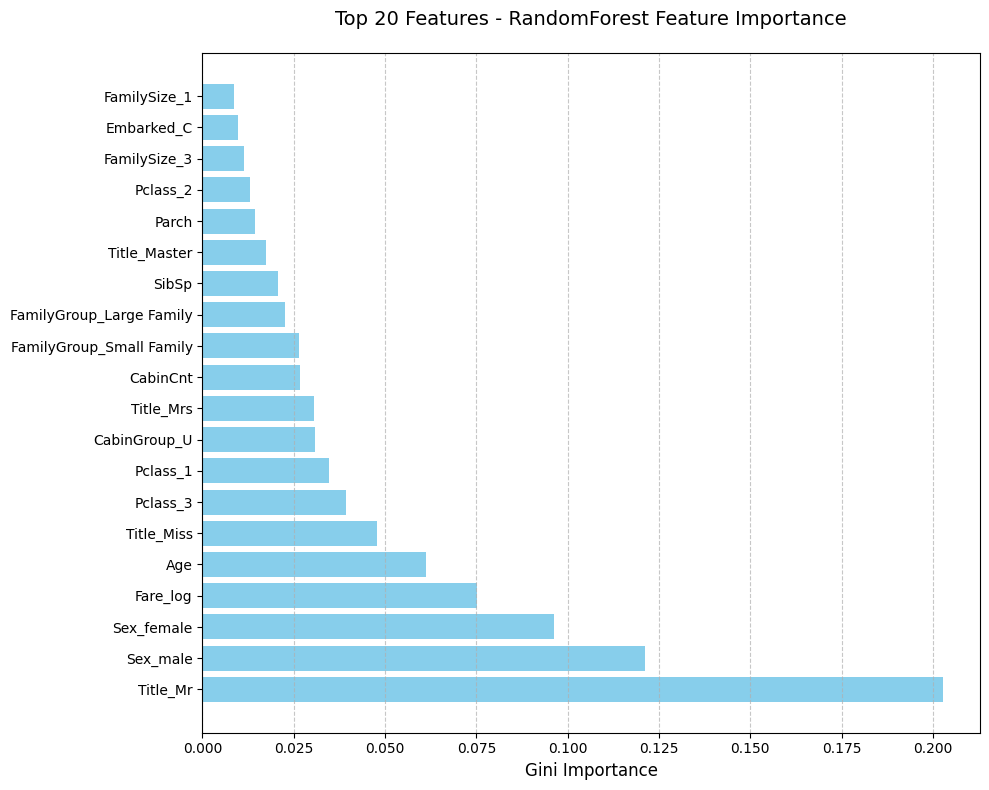

In [43]:
top_feature_importance_plot(model_rf_1, X_train, top_n=20)

In [44]:
def reduce_features_with_importance(model, X_train, X_test, classifier_step='classifier', threshold='mean'):
    """
    Reduces features in X_train and X_test based on feature importances from a fitted model.
    
    Parameters:
    - model: fitted pipeline model (e.g., Pipeline with a classifier)
    - X_train: original training data (pandas DataFrame or ndarray)
    - X_test: original testing data (same structure as X_train)
    - classifier_step: the name of the classifier step in the pipeline (default: 'classifier')
    - threshold: threshold for feature selection ('mean', float value, etc.)
    
    Returns:
    - X_train_reduced: transformed training data with selected features
    - X_test_reduced: transformed test data with selected features
    - selected_feature_names: list of selected feature names
    """
    # Get trained classifier and feature names
    clf = model.named_steps[classifier_step]
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
    
    # Initialize selector with trained classifier
    selector = SelectFromModel(clf, threshold=threshold, prefit=True)
    
    # Apply transformation
    X_train_reduced = selector.transform(X_train)
    X_test_reduced = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_feature_names = [name for name, selected in zip(feature_names, selected_features_mask) if selected]
    
    print("Reduced X_train shape:", X_train_reduced.shape)
    print("Reduced X_test shape:", X_test_reduced.shape)
    
    return X_train_reduced, X_test_reduced, selected_feature_names

In [45]:
X_train_reduced_1, X_test_reduced_1, selected_features = reduce_features_with_importance(model_rf_1, X_train, X_test)
print("Selected Features:", selected_features)

Reduced X_train shape: (891, 17)
Reduced X_test shape: (418, 17)
Selected Features: ['Age', 'SibSp', 'Parch', 'CabinCnt', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'FamilyGroup_Large Family', 'FamilyGroup_Small Family']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


#### Model 4: Random forest, lightly imbalanced data and 17 features

In [46]:
%%time
#5min 51s
#model_rf_3 = model_rf_selection_grid(X_train_reduced_1, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [47]:
# Save to file after fitting
#dump(model_rf_3, 'model_rf_3.joblib')
#model_rf_3.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_3.joblib')

# Access best estimator
model_rf_3 = grid_loaded.best_estimator_

In [48]:
%%time
#1.5s
train_and_predict(
    model=model_rf_3, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_3.csv'
)

Cross-validation scores: [0.8547486  0.82022472 0.8258427  0.81460674 0.85955056]
Mean cross-validation score: 0.8349946644906158
Submission saved to submit_rf_3.csv
CPU times: user 1.1 s, sys: 3.94 ms, total: 1.11 s
Wall time: 1.06 s


#### Score at kaggle 79.2%

### Feature Selection and Engineering

#### Model 5: Random forest, lightly imbalanced data and fare

In [49]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize']])

X_train_1 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_1 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [50]:
%%time
#6min 5s
#model_rf_4 = model_rf_selection_grid(X_train_1, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [51]:
# Save to file after fitting
#dump(model_rf_4, 'model_rf_4.joblib')
#model_rf_4.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_4.joblib')

# Access best estimator
model_rf_4 = grid_loaded.best_estimator_

In [52]:
%%time
#1min 53s
train_and_predict(
    model=model_rf_4, # Tweak to find the best model and try other ml models
    X_train=X_train_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_4.csv'
)

Cross-validation scores: [0.83798883 0.8258427  0.83707865 0.80898876 0.87640449]
Mean cross-validation score: 0.8372606867114432
Submission saved to submit_rf_4.csv
CPU times: user 800 ms, sys: 6.71 ms, total: 807 ms
Wall time: 706 ms


#### Score at kaggle 78.5%

[go to top](#top)  

#### Model 6: Random forest, lightly imbalanced data and title, 72 Features

In [53]:
df_1 = df.copy()

In [54]:
df_1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [55]:
# Title mapping dictionary
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

# Define the corrected function
def map_titles(df):
    """
    Maps existing titles in the 'Title' column to standard groups using a predefined dictionary.

    Parameters:
    - df: pandas DataFrame with a 'Title' column

    Returns:
    - df: DataFrame with a new 'Title_Less' column
    """
    # Map using dictionary
    df['Title_Less'] = df['Title'].map(Title_Dictionary)

    # Fill any unmapped titles with 'Other'
    df['Title_Less'] = df['Title_Less'].fillna('Other')
    
    return df

In [56]:
# Apply the get_titles function
df_1 = map_titles(df_1)

# Show a random sample of 5 rows
df_1.sample(5)

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_set,AgeGroup,CabinGroup,CabinNo,CabinCnt,Fare_log,Title,Surname,TicketGroup,FamilyGroup,FareGroup,FamilySize,Title_Less
1193,1194,NaN,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.00,S,0,Adult,U,0,0,3.091042,Mr,Phillips,LINE,Solo,<50,1,Mr
1182,1183,NaN,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.95,Q,0,Adult,U,0,0,2.073172,Miss,Daly,XXX,Small Family,50-100,2,Miss
1151,1152,NaN,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.40,S,0,Adult,U,0,0,2.912351,Mr,de,XXX,Solo,<50,1,Mr
535,536,1.0,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,S,1,Child,U,0,0,3.305054,Miss,Hart,FCC,Small Family,<50,3,Miss
1189,1190,NaN,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.50,S,0,Adult,U,0,0,3.839452,Mr,Loring,XXX,Solo,<50,1,Mr


In [57]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df_1[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title_Less',
       'TicketGroup', 'FamilyGroup','FamilySize']])

X_train_2 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_2 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [58]:
X_test_2.shape

(418, 72)

In [59]:
df_1['Title_Less'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'Other'],
      dtype=object)

In [60]:
df_1['Title_Less'].isna().sum()

0

In [61]:
%%time
#6min 17s
#model_rf_5 = model_rf_selection_grid(X_train_2, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [62]:
# Save to file after fitting
#dump(model_rf_5, 'model_rf_5.joblib')
#model_rf_5.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_5.joblib')

# Access best estimator
model_rf_5 = grid_loaded.best_estimator_

In [63]:
%%time
#826 ms
train_and_predict(
    model=model_rf_5, # Tweak to find the best model and try other ml models
    X_train=X_train_2, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_2, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_5.csv'
)

Cross-validation scores: [0.83798883 0.8258427  0.83707865 0.80337079 0.87078652]
Mean cross-validation score: 0.8350134957002071
Submission saved to submit_rf_5.csv
CPU times: user 808 ms, sys: 841 µs, total: 809 ms
Wall time: 701 ms


#### Score at kaggle 78.5%

[go to top](#top)  

### Feature Importance X_train_2 (72 Features)
#### Model 7: Random forest, lightly imbalanced data and title, 17 Features

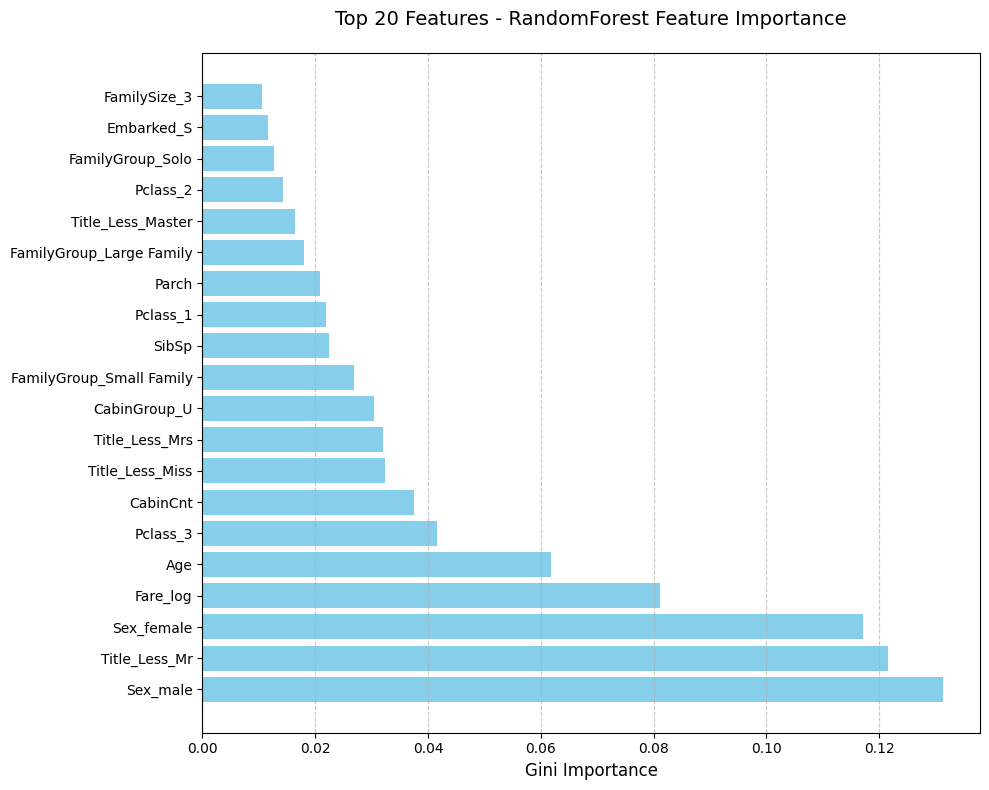

In [64]:
top_feature_importance_plot(model_rf_5, X_train_2, top_n=20)

In [65]:
X_train_reduced_2, X_test_reduced_2, selected_features_2 = reduce_features_with_importance(model_rf_5, X_train_2, X_test_2)
print("Selected Features:", selected_features_2)

Reduced X_train shape: (891, 17)
Reduced X_test shape: (418, 17)
Selected Features: ['Age', 'SibSp', 'Parch', 'CabinCnt', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Less_Master', 'Title_Less_Miss', 'Title_Less_Mr', 'Title_Less_Mrs', 'FamilyGroup_Large Family', 'FamilyGroup_Small Family']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [66]:
%%time
#5min 28s
#model_rf_6 = model_rf_selection_grid(X_train_reduced_2, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [67]:
# Save to file after fitting
#dump(model_rf_6, 'model_rf_6.joblib')
#model_rf_6.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_6.joblib')

# Access best estimator
model_rf_6 = grid_loaded.best_estimator_

In [68]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_6, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_2, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_2, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_6.csv'
)

Cross-validation scores: [0.8547486  0.82022472 0.8258427  0.81460674 0.85955056]
Mean cross-validation score: 0.8349946644906158
Submission saved to submit_rf_6.csv
CPU times: user 1.1 s, sys: 6.63 ms, total: 1.11 s
Wall time: 1.06 s


#### Score at kaggle 79.2%

[go to top](#top)  

### Feature Engineering

In [69]:
def apply_group_rules(df):
    """
    Apply prediction rules based on demographic and family survival likelihood.
    - Predict '0' (die) for highest fatality group.
    - Predict '1' (live) for highest survival group.
    - Leave others as NaN for ML model to predict later.
    """
    # Ensure necessary columns exist
    required_cols = ['Sex', 'Title', 'AgeGroup', 'FamilyGroup']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Create a new column to store predictions
    df['Survived_Predict'] = np.nan

    # --- Rule 1: Predict Die for Highest Fatality Group ---
    cond_die = (
        (df['Sex'] == 'male') &
        (df['Title'] == 'Mr') &
        (df['AgeGroup'].isin(['Teen', 'Young Adult', 'Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small']))
    )
    df.loc[cond_die, 'Survived_Predict'] = 0

    # --- Rule 2: Predict Live for Highest Survival Group ---
    cond_live = (
        (df['Sex'] == 'female') &
        (df['Title'].isin(['Miss', 'Mrs'])) &
        (df['AgeGroup'].isin(['Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small']))
    )
    df.loc[cond_live,
    'Survived_Predict'] = 1

    return df

In [70]:
df_2 = df.copy()

In [71]:
# Apply rules to your dataframe
df_2 = apply_group_rules(df_2)

In [72]:
df_2.head()

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_set,AgeGroup,CabinGroup,CabinNo,CabinCnt,Fare_log,Title,Surname,TicketGroup,FamilyGroup,FareGroup,FamilySize,Survived_Predict
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Young Adult,U,0,0,2.110213,Mr,Braund,A5,Small Family,<50,2,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Adult,C,85,1,4.280593,Mrs,Cumings,PC,Small Family,50-100,2,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Young Adult,U,0,0,2.188856,Miss,Heikkinen,STONO2,Solo,<50,1,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Adult,C,123,1,3.990834,Mrs,Futrelle,XXX,Small Family,50-100,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,U,0,0,2.202765,Mr,Allen,XXX,Solo,<50,1,0.0


#### Model 8: Random forest, lightly imbalanced data and title, 86 Features

In [73]:
# Only show rows where a rule-based prediction was made
#filtered_df = df_2[df_2['Survived_Predict'].notna()]

# Plot with hue='Survived' (actual outcome)
#plt.figure(figsize=(10, 6))
#sns.countplot(
    #data=filtered_df,
    #x='Survived_Predict',
    #hue='Survived',
    #palette='Set2'
#)
#plt.title('Rule-Based Predictions vs Actual Survived')
#plt.xlabel('Predicted by Rules (0 = Die, 1 = Live)')
#plt.ylabel('Count')
#plt.legend(title='Actual Survived')
#plt.show()


In [74]:
df_2['Survived_Predict'].dtypes

dtype('float64')

In [75]:
# Convert the 'Pclass' and 'FamilySize' columns to string (object) type for pd.get_dummies() Using this will acquire 83 features
# Let us apply without converting to string
df_2[['Survived_Predict']] = df_2[['Survived_Predict']].astype(str)

In [76]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df_2[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize','Survived_Predict']])

X_train_3 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_3 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [77]:
X_train_3.shape

(891, 86)

In [78]:
%%time
#6min 17s
#model_rf_7 = model_rf_selection_grid(X_train_3, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [79]:
# Save to file after fitting
#dump(model_rf_7, 'model_rf_7.joblib')
#model_rf_7.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_7.joblib')

# Access best estimator
model_rf_7 = grid_loaded.best_estimator_

In [80]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_7, # Tweak to find the best model and try other ml models
    X_train=X_train_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_7.csv'
)

Cross-validation scores: [0.83240223 0.82022472 0.83146067 0.81460674 0.85955056]
Mean cross-validation score: 0.8316489862532169
Submission saved to submit_rf_7.csv
CPU times: user 1.3 s, sys: 4.49 ms, total: 1.31 s
Wall time: 1.21 s


#### Score at kaggle 78.9%

### Feature Importance X_train_2 (86 Features)
#### Model 9: Random forest, lightly imbalanced data, 19 Features

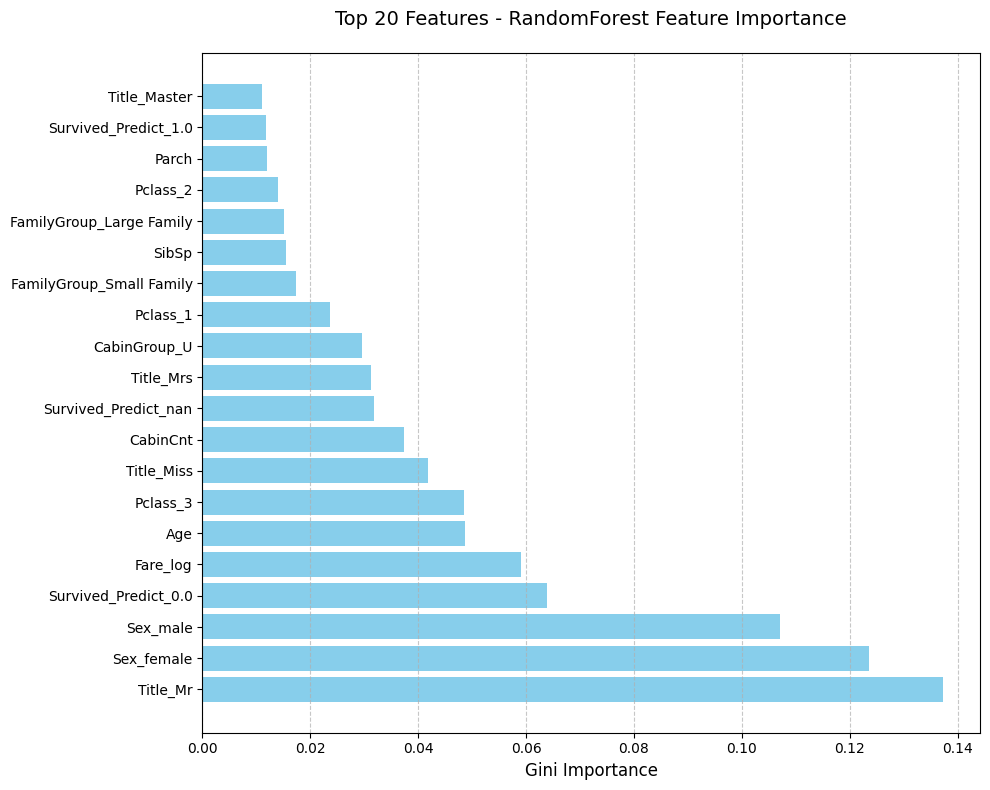

In [81]:
top_feature_importance_plot(model_rf_7, X_train_3, top_n=20)

In [82]:
X_train_reduced_3, X_test_reduced_3, selected_features_3 = reduce_features_with_importance(model_rf_7, X_train_3, X_test_3)
print("Selected Features:", selected_features_3)

Reduced X_train shape: (891, 19)
Reduced X_test shape: (418, 19)
Selected Features: ['Age', 'SibSp', 'Parch', 'CabinCnt', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'FamilyGroup_Large Family', 'FamilyGroup_Small Family', 'Survived_Predict_0.0', 'Survived_Predict_1.0', 'Survived_Predict_nan']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [83]:
%%time
#5min 23s
#model_rf_8 = model_rf_selection_grid(X_train_reduced_3, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [84]:
# Save to file after fitting
#dump(model_rf_8, 'model_rf_8.joblib')
#model_rf_8.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_8.joblib')

# Access best estimator
model_rf_8 = grid_loaded.best_estimator_

In [85]:
%%time
#1.69 s
train_and_predict(
    model=model_rf_8, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_8.csv'
)

Cross-validation scores: [0.83798883 0.80337079 0.84831461 0.79775281 0.87078652]
Mean cross-validation score: 0.8316427091833531
Submission saved to submit_rf_8.csv
CPU times: user 1.14 s, sys: 6.81 ms, total: 1.14 s
Wall time: 1.1 s


#### Score at kaggle 77.8%

### Increase the feature importance treshold from mean to 0.03
#### Model 9: Random forest, lightly imbalanced data and title, model_rf_5, 10 Features 

In [86]:
X_train_reduced_4, X_test_reduced_4, selected_features_4 = reduce_features_with_importance(model_rf_5, 
                                                                                           X_train_2, X_test_2,
                                                                                           classifier_step='classifier', 
                                                                                           threshold=0.03)
print("Selected Features:", selected_features_4)

Reduced X_train shape: (891, 10)
Reduced X_test shape: (418, 10)
Selected Features: ['Age', 'CabinCnt', 'Fare_log', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Less_Miss', 'Title_Less_Mr', 'Title_Less_Mrs']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [87]:
%%time
#6min 41s
#model_rf_9 = model_rf_selection_grid(X_train_reduced_4, y_train, cv=5, scoring='accuracy', class_weight=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [88]:
# Save to file after fitting
#dump(model_rf_9, 'model_rf_9.joblib')
#model_rf_9.best_estimator_

# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/10/model_rf_9.joblib')

# Access best estimator
model_rf_9 = grid_loaded.best_estimator_

In [89]:
%%time
#1.69 s
train_and_predict(
    model=model_rf_9, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_4, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_4, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_9.csv'
)

Cross-validation scores: [0.83798883 0.78651685 0.87078652 0.79775281 0.86516854]
Mean cross-validation score: 0.8316427091833531
Submission saved to submit_rf_9.csv
CPU times: user 1.23 s, sys: 5.6 ms, total: 1.24 s
Wall time: 1.23 s


#### Score at kaggle 77.5%

### Focusing on tuning classifier__max_depth (maintain the others
#### max_depth:4

In [90]:
# Define the pipeline with fixed parameters
model_rf_16 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=4,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [91]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_16, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_24.csv'
)

Cross-validation scores: [0.8547486  0.82022472 0.8258427  0.81460674 0.85955056]
Mean cross-validation score: 0.8349946644906158
Submission saved to submit_rf_24.csv
CPU times: user 917 ms, sys: 2.83 ms, total: 920 ms
Wall time: 874 ms


#### Score at kaggle 79.2% (83 Features - Reduced to 17 Features)

#### Max_depth = 6

In [92]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup']])

X_train_4 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_4 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [93]:
X_train_4.shape

(891, 74)

In [94]:
# Define the pipeline with fixed parameters
model_rf_17 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=6,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [95]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_17, # Tweak to find the best model and try other ml models
    X_train=X_train_4, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_4, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_25.csv'
)

Cross-validation scores: [0.84916201 0.82022472 0.83707865 0.80898876 0.85955056]
Mean cross-validation score: 0.8350009415604795
Submission saved to submit_rf_25.csv
CPU times: user 1.03 s, sys: 783 µs, total: 1.03 s
Wall time: 930 ms


In [96]:
# Load it later when needed
grid_loaded = load('/kaggle/input/titanic-models/scikitlearn/default/11/model_rf_3_1.joblib')

# Access best estimator
model_rf_18 = grid_loaded.best_estimator_

In [97]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_18, # Tweak to find the best model and try other ml models
    X_train=X_train_4, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_4, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_26.csv'
)

Cross-validation scores: [0.84916201 0.82022472 0.83707865 0.80898876 0.85955056]
Mean cross-validation score: 0.8350009415604795
Submission saved to submit_rf_26.csv
CPU times: user 1.31 s, sys: 7.83 ms, total: 1.32 s
Wall time: 1.22 s


#### Score at kaggle 78.9% (74 Features). This mean cv score 83.5% while prior 82.3% (unable to replicate 79.4%)

In [98]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_17, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_27.csv'
)

Cross-validation scores: [0.83798883 0.82022472 0.8258427  0.80337079 0.85955056]
Mean cross-validation score: 0.8293955181721173
Submission saved to submit_rf_27.csv
CPU times: user 969 ms, sys: 6.65 ms, total: 975 ms
Wall time: 931 ms


### Others

#### max_depth =10

In [99]:
# Define the pipeline with fixed parameters
model_rf_19 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [100]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_19, # Tweak to find the best model and try other ml models
    X_train=X_train_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_27.csv'
)

Cross-validation scores: [0.81564246 0.79775281 0.8258427  0.79213483 0.85955056]
Mean cross-validation score: 0.8181846713953927
Submission saved to submit_rf_27.csv
CPU times: user 1.18 s, sys: 4.85 ms, total: 1.19 s
Wall time: 1.09 s


In [101]:
X_train_3.shape

(891, 86)

In [102]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_19, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_28.csv'
)

Cross-validation scores: [0.83798883 0.78651685 0.83707865 0.79213483 0.85955056]
Mean cross-validation score: 0.8226539451384094
Submission saved to submit_rf_28.csv
CPU times: user 1.05 s, sys: 5.89 ms, total: 1.05 s
Wall time: 1.01 s


In [103]:
X_train_reduced_3.shape

(891, 19)

#### Score at kaggle 79.7% (19 Features) - Apply rule

#### Max_depth = 10 with base X_train_reduced_1 (17 features). Back again with diferrengt feature reduced

In [104]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_19, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_29.csv'
)

Cross-validation scores: [0.83798883 0.78089888 0.85955056 0.79213483 0.84831461]
Mean cross-validation score: 0.8237775406440273
Submission saved to submit_rf_29.csv
CPU times: user 1.01 s, sys: 10.9 ms, total: 1.02 s
Wall time: 976 ms


In [105]:
X_train_reduced_1.shape

(891, 17)

#### Score at kaggle 77.8% (Base 17 Features)

#### Max_depth = 9 criterion = 'gini

In [106]:
# Define the pipeline with fixed parameters
model_rf_20 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=9,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='gini',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [107]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_20, # Tweak to find the best model and try other ml models
    X_train=X_train_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_30.csv'
)

Cross-validation scores: [0.82681564 0.80898876 0.83146067 0.80898876 0.84831461]
Mean cross-validation score: 0.824913690289373
Submission saved to submit_rf_30.csv
CPU times: user 1.23 s, sys: 8.64 ms, total: 1.24 s
Wall time: 1.13 s


#### Score at kaggle 77.8% (Base 83 Features)

In [108]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_20, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_1, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_1, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_31.csv'
)

Cross-validation scores: [0.83798883 0.78651685 0.84831461 0.79213483 0.85955056]
Mean cross-validation score: 0.8249011361496453
Submission saved to submit_rf_31.csv
CPU times: user 966 ms, sys: 3.85 ms, total: 970 ms
Wall time: 921 ms


In [109]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_20, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_32.csv'
)

Cross-validation scores: [0.82681564 0.79775281 0.84831461 0.80337079 0.87640449]
Mean cross-validation score: 0.8305316678174629
Submission saved to submit_rf_32.csv
CPU times: user 983 ms, sys: 6.75 ms, total: 990 ms
Wall time: 941 ms


#### Score at kaggle 78.3% (Base 83 Features)

### Recoding the reduced feature using the similar hyperparameter tuning
#### Apply different group rules (adding surname), model_rf_19 (max_depth (10)) and features reduce by feature importance

In [110]:
def apply_group_rules_1(df):
    """
    Apply prediction rules based on demographic and family survival likelihood,
    including surname-based survival rates.
    - Predict '0' (die) for highest fatality group and low-survival surnames.
    - Predict '1' (live) for highest survival group and high-survival surnames.
    - Leave others as NaN for ML model to predict later.
    """

    # Ensure necessary columns exist
    required_cols = ['Sex', 'Title', 'AgeGroup', 'FamilyGroup', 'Surname', 'Survived']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Create new column for predictions
    df['Survived_Predict'] = np.nan

    # --- Calculate surname survival rates ---
    surname_survival_rate = df.groupby('Surname')['Survived'].mean()

    high_survival_surnames = surname_survival_rate[surname_survival_rate > 0.8].index
    low_survival_surnames = surname_survival_rate[surname_survival_rate < 0.4].index

    # --- Rule 1: Predict Die for Highest Fatality Group + Low-Survival Surnames ---
    cond_die = (
        ((df['Sex'] == 'male') &
         (df['Title'] == 'Mr') &
         (df['AgeGroup'].isin(['Teen', 'Young Adult', 'Adult', 'Senior'])) &
         (df['FamilyGroup'].isin(['Solo', 'Small']))) |
        (df['Surname'].isin(low_survival_surnames))
    )
    df.loc[cond_die, 'Survived_Predict'] = 0

    # --- Rule 2: Predict Live for Highest Survival Group + High-Survival Surnames ---
    cond_live = (
        ((df['Sex'] == 'female') &
         (df['Title'].isin(['Miss', 'Mrs'])) &
         (df['AgeGroup'].isin(['Adult', 'Senior'])) &
         (df['FamilyGroup'].isin(['Solo', 'Small']))) |
        (df['Surname'].isin(high_survival_surnames))
    )
    df.loc[cond_live, 'Survived_Predict'] = 1

    # Convert to string type
    df['Survived_Predict'] = df['Survived_Predict'].astype('Int64').astype(str)

    return df

In [111]:
df_3 = df.copy()
# Apply rules to your dataframe
df_3 = apply_group_rules_1(df_3)

invalid value encountered in greater
invalid value encountered in less


In [112]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df_3[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize','Survived_Predict']])

X_train_5 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_5 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

I have made a mistake nit changing the aplly_group_rule "Survived_Predict" to str

In [113]:
X_train_5.shape

(891, 86)

In [114]:
# Define the pipeline with fixed parameters
model_rf_19 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [115]:
# Fit the pipeline on unscaled data
model_rf_19.fit(X_train_5, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_split=10, n_jobs=1,
                                        random_state=42))])

In [116]:
# Use unscaled data for transformation (since scaling is in pipeline)
X_train_reduced_5, X_test_reduced_5, selected_features_5 = reduce_features_with_importance(model_rf_19, X_train_5, X_test_5)
print("Selected Features:", selected_features_5)

Reduced X_train shape: (891, 13)
Reduced X_test shape: (418, 13)
Selected Features: ['Age', 'CabinCnt', 'Fare_log', 'Pclass_3', 'Sex_female', 'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'FamilyGroup_Small Family', 'Survived_Predict_0', 'Survived_Predict_1', 'Survived_Predict_<NA>']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [117]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_19, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_5, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_5, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_33.csv'
)

Cross-validation scores: [0.96648045 0.96067416 0.97191011 0.9494382  0.97752809]
Mean cross-validation score: 0.9652062017450256
Submission saved to submit_rf_33.csv
CPU times: user 938 ms, sys: 0 ns, total: 938 ms
Wall time: 893 ms


#### The first lower score below 75% to 73.7% but acquired metric to 96.5% so this is data leakage and overfitting - I have not changed "Survived_Predict" as str. I have changed it to str, the results is still the same.

In [118]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_19, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_34.csv'
)

Cross-validation scores: [0.83798883 0.78651685 0.83707865 0.79213483 0.85955056]
Mean cross-validation score: 0.8226539451384094
Submission saved to submit_rf_34.csv
CPU times: user 1.05 s, sys: 3.76 ms, total: 1.05 s
Wall time: 1 s


Cross-validation scores: [0.83798883 0.78651685 0.83707865 0.79213483 0.85955056]
Mean cross-validation score: 0.8226539451384094
Submission saved to submit_rf_28.csv
CPU times: user 1.37 s, sys: 8.91 ms, total: 1.38 s
Wall time: 1.38 s

#### Kaggle Score 79.7%

#### Try Model 20 again

In [119]:
# Fit the pipeline on unscaled data
model_rf_20.fit(X_train_5, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=9, min_samples_split=10,
                                        n_jobs=1, random_state=42))])

In [120]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_20, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_5, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_5, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    #submission_name='submit_rf_35.csv'
)

Cross-validation scores: [0.96648045 0.96067416 0.96629213 0.9494382  0.98314607]
Mean cross-validation score: 0.9652062017450256
Submission saved to submission.csv
CPU times: user 927 ms, sys: 3.74 ms, total: 931 ms
Wall time: 886 ms


In [121]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_20, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    #submission_name='submit_rf_36.csv'
)

Cross-validation scores: [0.82681564 0.79775281 0.84831461 0.80337079 0.87640449]
Mean cross-validation score: 0.8305316678174629
Submission saved to submission.csv
CPU times: user 999 ms, sys: 14.7 ms, total: 1.01 s
Wall time: 967 ms


Cross-validation scores: [0.82681564 0.79775281 0.84831461 0.80337079 0.87640449]
Mean cross-validation score: 0.8305316678174629
Submission saved to submit_rf_32.csv
CPU times: user 1.32 s, sys: 6 ms, total: 1.32 s
Wall time: 1.32 s

Similar to submit_32

### Change the algorithm so it does not over fit

In [122]:
# Filter data
female_died = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

# Find surnames in both filtered datasets
surnames_female_died = set(female_died['Surname'])
surnames_male_survived = set(male_survived['Surname'])

# Intersection
common_surnames = surnames_female_died & surnames_male_survived

print("Surnames where females died:")
print(sorted(surnames_female_died))
print("-" * 40)
print("Surnames where males survived:")
print(sorted(surnames_male_survived))

Surnames where females died:
['Ahlin', 'Allison', 'Andersson', 'Arnold-Franchi', 'Attalah', 'Barbara', 'Boulos', 'Bourke', 'Cacic', 'Canavan', 'Caram', 'Carter', 'Dahlberg', 'Danbom', 'Ford', 'Funk', 'Goodwin', 'Haas', 'Harknett', 'Hegarty', 'Heininen', 'Henry', 'Ilmakangas', 'Isham', 'Johnston', 'Jussila', 'Lahtinen', 'Laitinen', 'Lefebre', 'Lindahl', 'Lindblom', 'Lobb', 'Mack', 'Mangan', 'Meanwell', 'Meek', "O'Sullivan", 'Olsson', 'Oreskovic', 'Palsson', 'Panula', 'Peters', 'Petranec', 'Pettersson', 'Rice', 'Robins', 'Rosblom', 'Sage', 'Skoog', 'Strandberg', 'Strom', 'Turpin', 'Van', 'Vander', 'Vestrom', 'Yrois', 'Zabour']
----------------------------------------
Surnames where males survived:
['Albimona', 'Allison', 'Anderson', 'Andersson', 'Asplund', 'Barah', 'Barkworth', 'Beane', 'Becker', 'Beckwith', 'Beesley', 'Behr', 'Bing', 'Bishop', 'Bjornstrom-Steffansson', 'Blank', 'Bradley', 'Calderhead', 'Caldwell', 'Cardeza', 'Carter', 'Chambers', 'Chip', 'Cohen', 'Coutts', 'Dahl', 'Daly

In [123]:
def apply_group_rules_2(df):
    """
    Apply prediction rules based on demographic and surname survival patterns:
    - Predict '0' (die) for high-fatality males NOT from male-survived surnames.
    - Predict '1' (live) for high-survival females NOT from female-died surnames.
    - Leave others as NaN for ML model to predict.
    """

    import numpy as np

    # Ensure necessary columns exist
    required_cols = ['Sex', 'Title', 'AgeGroup', 'FamilyGroup', 'Surname', 'Survived']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    df['Survived_Predict'] = np.nan

    # --- Build exclusion surname sets ---
    female_died = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
    male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

    surnames_female_died = set(female_died['Surname'])
    surnames_male_survived = set(male_survived['Surname'])

    # --- Rule 1: Predict Die for high-fatality males not in male-survived surnames ---
    cond_die = (
        (df['Sex'] == 'male') &
        (df['Title'] == 'Mr') &
        (df['AgeGroup'].isin(['Teen', 'Young Adult', 'Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small'])) &
        (~df['Surname'].isin(surnames_male_survived))  # Exclude surnames where males survived
    )
    df.loc[cond_die, 'Survived_Predict'] = 0

    # --- Rule 2: Predict Live for high-survival females not in female-died surnames ---
    cond_live = (
        (df['Sex'] == 'female') &
        (df['Title'].isin(['Miss', 'Mrs'])) &
        (df['AgeGroup'].isin(['Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small'])) &
        (~df['Surname'].isin(surnames_female_died))  # Exclude surnames where females died
    )
    df.loc[cond_live, 'Survived_Predict'] = 1

    # Convert predictions to string
    df['Survived_Predict'] = df['Survived_Predict'].astype('Int64').astype(str)

    return df


In [124]:
df_4 = df.copy()
# Apply rules to your dataframe
df_4 = apply_group_rules_2(df_4)

In [125]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df_4[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize','Survived_Predict']])

X_train_6 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_6 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [126]:
# Define the pipeline with fixed parameters
model_rf_21 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [127]:
# Fit the pipeline on unscaled data
model_rf_21.fit(X_train_6, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_split=10, n_jobs=1,
                                        random_state=42))])

In [128]:
# Use unscaled data for transformation (since scaling is in pipeline)
X_train_reduced_6, X_test_reduced_6, selected_features_6 = reduce_features_with_importance(model_rf_21, X_train_6, X_test_6)
print("Selected Features:", selected_features_6)

Reduced X_train shape: (891, 22)
Reduced X_test shape: (418, 22)
Selected Features: ['Age', 'SibSp', 'Parch', 'CabinCnt', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'FamilyGroup_Large Family', 'FamilyGroup_Small Family', 'FamilyGroup_Solo', 'FamilySize_1', 'Survived_Predict_0', 'Survived_Predict_1', 'Survived_Predict_<NA>']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [129]:
X_train_6.shape

(891, 86)

In [130]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_21, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_6, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_6, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_37.csv'
)

Cross-validation scores: [0.89944134 0.85955056 0.92696629 0.87640449 0.8988764 ]
Mean cross-validation score: 0.8922478187182223
Submission saved to submit_rf_37.csv
CPU times: user 992 ms, sys: 4.8 ms, total: 997 ms
Wall time: 951 ms


#### Kaggle Score 78.7%

In [131]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_21, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    #submission_name='submit_rf_37.csv'
)

Cross-validation scores: [0.83798883 0.78651685 0.83707865 0.79213483 0.85955056]
Mean cross-validation score: 0.8226539451384094
Submission saved to submission.csv
CPU times: user 1.07 s, sys: 0 ns, total: 1.07 s
Wall time: 1.02 s


Cross-validation scores: [0.83798883 0.78651685 0.83707865 0.79213483 0.85955056]
Mean cross-validation score: 0.8226539451384094
Submission saved to submit_rf_28.csv
CPU times: user 1.37 s, sys: 8.91 ms, total: 1.38 s
Wall time: 1.38 s

#### Similar to the 79.7% score

In [132]:
# Define the pipeline with fixed parameters
model_rf_22 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=9,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [133]:
# Fit the pipeline on unscaled data
model_rf_22.fit(X_train_3, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_split=10, n_jobs=1,
                                        random_state=42))])

In [134]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_22, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_38.csv'
)

Cross-validation scores: [0.84357542 0.79213483 0.84831461 0.79213483 0.85955056]
Mean cross-validation score: 0.8271420500910176
Submission saved to submit_rf_38.csv
CPU times: user 1 s, sys: 3.86 ms, total: 1.01 s
Wall time: 960 ms


### Kaggle Score 79.2%

#### In Random Forest, the max_depth parameter controls the maximum depth of each decision tree. Setting it appropriately is important for:

#### Avoiding overfitting (trees too deep and complex).

#### Avoiding underfitting (trees too shallow, poor accuracy).

In [135]:
# Define the pipeline with fixed parameters
model_rf_23 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=6,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [136]:
# Fit the pipeline on unscaled data
model_rf_23.fit(X_train_3, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        min_samples_split=10, n_jobs=1,
                                        random_state=42))])

In [137]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_23, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_39.csv'
)

Cross-validation scores: [0.83240223 0.80337079 0.8258427  0.79213483 0.85955056]
Mean cross-validation score: 0.8226602222082733
Submission saved to submit_rf_39.csv
CPU times: user 959 ms, sys: 2.76 ms, total: 962 ms
Wall time: 914 ms


Max_depth = 15 got 78.7%,Max_depth =11 (78.5%), Max_depth=8 (79.7%)
#### Max_depth = 6 , kaggle score 79,9%

In [138]:
# Define the pipeline with fixed parameters
model_rf_24 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        max_depth=7,
        n_estimators=100,
        max_features='sqrt',
        min_samples_split=10,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        n_jobs=1,
        verbose=0,
        bootstrap=True,
        oob_score=False,
        criterion='entropy',
        random_state=42,
        class_weight=None,
        warm_start=False
    ))
])

In [139]:
# Fit the pipeline on unscaled data
model_rf_24.fit(X_train_3, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        min_samples_split=10, n_jobs=1,
                                        random_state=42))])

In [140]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_24, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_3, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_3, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_40.csv'
)

Cross-validation scores: [0.83240223 0.78651685 0.84269663 0.79775281 0.85393258]
Mean cross-validation score: 0.8226602222082733
Submission saved to submit_rf_40.csv
CPU times: user 952 ms, sys: 5.88 ms, total: 958 ms
Wall time: 912 ms


Max_depth = 4 score 77,9%, Max_depth = 7 got 79,2%

#### Apply rule 3

In [141]:
def apply_group_rules_3(df):
    """
    Apply prediction rules based on demographic and surname survival patterns:
    - Predict '0' (die) for high-fatality males NOT from male-survived surnames.
    - Predict '1' (live) for high-survival females NOT from female-died surnames.
    - Leave others as NaN for ML model to predict.
    """

    import numpy as np

    # Ensure necessary columns exist
    required_cols = ['Sex', 'Title', 'AgeGroup', 'FamilyGroup', 'Surname', 'Survived']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    df['Survived_Predict'] = np.nan

    # --- Build exclusion surname sets ---
    female_died = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
    male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

    surnames_female_died = set(female_died['Surname'])
    surnames_male_survived = set(male_survived['Surname'])

    # --- Rule 1: Predict Die for high-fatality males not in male-survived surnames ---
    cond_die = (
        (df['Sex'] == 'male') &
        (df['Title'] == 'Mr') &
        (df['AgeGroup'].isin(['Teen', 'Young Adult', 'Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small']))
    )
    df.loc[cond_die, 'Survived_Predict'] = 0

    # --- Rule 2: Predict Live for high-survival females not in female-died surnames ---
    cond_live = (
        (df['Sex'] == 'female') &
        (df['Title'].isin(['Miss', 'Mrs'])) &
        (df['AgeGroup'].isin(['Adult', 'Senior'])) &
        (df['FamilyGroup'].isin(['Solo', 'Small'])) &
        (~df['Surname'].isin(surnames_female_died))  # Exclude surnames where females died
    )
    df.loc[cond_live, 'Survived_Predict'] = 1

    # Convert predictions to string
    df['Survived_Predict'] = df['Survived_Predict'].astype('Int64').astype(str)

    return df


In [142]:
df_5 = df.copy()
# Apply rules to your dataframe
df_5 = apply_group_rules_3(df_5)

In [143]:
# Created dummy variablesfrom categories (also can use OneHotEncoder)
df_dummies = pd.get_dummies(df_5[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'train_set',
       'CabinGroup', 'CabinCnt', 'Fare_log', 'Title',
       'TicketGroup', 'FamilyGroup','FamilySize','Survived_Predict']])

X_train_7 = df_dummies[df_dummies.train_set == 1].drop(['train_set'],axis=1)
X_test_7 = df_dummies[df_dummies.train_set == 0].drop(['train_set'], axis=1)

In [144]:
X_train_7.shape

(891, 86)

In [145]:
# Fit the pipeline on unscaled data
model_rf_23.fit(X_train_7, y_train)
# Use unscaled data for transformation (since scaling is in pipeline)
X_train_reduced_7, X_test_reduced_7, selected_features_7 = reduce_features_with_importance(model_rf_23, X_train_7, X_test_7)
print("Selected Features:", selected_features_7)

Reduced X_train shape: (891, 18)
Reduced X_test shape: (418, 18)
Selected Features: ['Age', 'SibSp', 'CabinCnt', 'Fare_log', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'CabinGroup_U', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'FamilyGroup_Large Family', 'FamilyGroup_Small Family', 'Survived_Predict_0', 'Survived_Predict_1', 'Survived_Predict_<NA>']


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


In [146]:
%%time
#1.45 s
train_and_predict(
    model=model_rf_23, # Tweak to find the best model and try other ml models
    X_train=X_train_reduced_7, # Tweak the features (e.g. add feature engineering or drop feature(s), features importance )
    y_train=y_train,
    X_test=X_test_reduced_7, # follow the changes in X_train
    test_ids=df[891:]['PassengerId'],
    cv=5, # Tweak the cv
    submission_name='submit_rf_41.csv'
)

Cross-validation scores: [0.84916201 0.81460674 0.83146067 0.80337079 0.85955056]
Mean cross-validation score: 0.8316301550436258
Submission saved to submit_rf_41.csv
CPU times: user 989 ms, sys: 4.37 ms, total: 993 ms
Wall time: 950 ms


#### Kaggle score 77.8%

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute - share</h1></div>

<h1><a id="Ex">Summary</a></h1>  

We have built classification models to predict survival rate.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The classification models to predict survival rate results
    <li>We started with 78,9% score
    <li>Our 6 attempt score 79.4% with max_depth of 6 and using 'entropy'
    <li>Our best model kaggle score is 79.9% using random forest model with max_depth =6 and using 'entropy' and applying rule
</ol>

In [147]:
def compare_rf_models(models_dict, kaggle_scores_dict):
    """
    Compares specified hyperparameters and Kaggle scores for a dictionary of Random Forest models.

    Parameters:
        models_dict (dict): Dictionary of model name to model object.
        kaggle_scores_dict (dict): Dictionary of model name to Kaggle score.

    Returns:
        pd.DataFrame: Sorted DataFrame comparing model parameters and Kaggle scores.
    """
    # Parameters to extract from each model
    params_to_extract = [
        'classifier__max_depth',
        'classifier__n_estimators',
        'classifier__max_features',
        'classifier__min_samples_split',
        'classifier__min_samples_leaf',
        'classifier__bootstrap',
        'classifier__oob_score',
        'classifier__criterion'
    ]
    
    model_data = []
    
    for model_name, model in models_dict.items():
        params = model.get_params()
        row = {'Model': model_name, 'Kaggle Score (%)': kaggle_scores_dict.get(model_name, None)}
        for param in params_to_extract:
            row[param] = params.get(param, None)
        model_data.append(row)
    
    # Create DataFrame and sort by Kaggle Score
    df = pd.DataFrame(model_data)
    df_sorted = df.sort_values(by='Kaggle Score (%)', ascending=False).reset_index(drop=True)
    
    return df_sorted

In [148]:
# Example usage:
models = {
    'model_rf_1': model_rf_1,
    'model_rf_2': model_rf_2,
    'model_rf_3': model_rf_3,
    'model_rf_4': model_rf_4,
    'model_rf_5': model_rf_5,
    'model_rf_6': model_rf_6,
    'model_rf_7': model_rf_7,
    'model_rf_8': model_rf_8,
    'model_rf_9': model_rf_9,
    'model_rf_19': model_rf_19,
    'model_rf_23': model_rf_23
}

kaggle_scores = {
    'model_rf_1': 78.5,
    'model_rf_2': 76.8,
    'model_rf_3': 79.2,
    'model_rf_4': 78.5,
    'model_rf_5': 78.5,
    'model_rf_6': 79.2,
    'model_rf_7': 78.9,
    'model_rf_8': 77.8,
    'model_rf_9': 77.5,
    'model_rf_19': 79.7,
    'model_rf_23': 79.9
}

# Call the function
df_rf_comparison = compare_rf_models(models, kaggle_scores)

# Display the result
df_rf_comparison

,Model,Kaggle Score (%),classifier__max_depth,classifier__n_estimators,classifier__max_features,classifier__min_samples_split,classifier__min_samples_leaf,classifier__bootstrap,classifier__oob_score,classifier__criterion
0,model_rf_23,79.9,6,100,sqrt,10,1,True,False,entropy
1,model_rf_19,79.7,10,100,sqrt,10,1,True,False,entropy
2,model_rf_3,79.2,4,100,sqrt,10,1,True,True,entropy
3,model_rf_6,79.2,4,100,sqrt,10,1,True,True,entropy
4,model_rf_7,78.9,6,100,sqrt,2,1,True,True,gini
5,model_rf_1,78.5,10,50,sqrt,2,3,True,True,gini
6,model_rf_4,78.5,10,50,sqrt,2,3,True,True,gini
7,model_rf_5,78.5,8,50,log2,3,1,True,True,entropy
8,model_rf_8,77.8,10,100,sqrt,2,3,True,True,gini
9,model_rf_9,77.5,10,100,sqrt,3,1,True,True,entropy


In <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p01-ml-titanic-20250407">Part 1 (P01).</a>Part 2 (P02), we conducted the P and A phase.  we explored 12 machine learning models, including initial tuning for Random Forest. Subsequently,  <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p03-ml-titanic-20250506">part 3 (P03)</a> focused on further exploration and tuning of Random Forest and Support Vector Classifier (SVC) models and also we add some back to part 2.Finally,  <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p04-ml-titanic-20250507">part 4 (P04) investigated boosting techniques and a Voting Classifier incorporating Boosting and Random Forest.</a>

In [149]:
from IPython.display import display, HTML
# Link HTML files for pages
output_file_01 = "https://www.kaggle.com/code/wahyuardhitama/task001-p01-ml-titanic-20250407"
output_file_03 = "https://www.kaggle.com/code/wahyuardhitama/task001-p03-ml-titanic-20250506"
output_file_04 = "https://www.kaggle.com/code/wahyuardhitama/task001-p04-ml-titanic-20250507"

# Display links to the saved HTML files
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_01}' target='_blank' style='font-size: 18px;'>P01 </a></p>"))
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_03}' target='_blank' style='font-size: 18px;'>P03 </a></p>"))
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_04}' target='_blank' style='font-size: 18px;'>P04 </a></p>"))

[go to top](#top)  